In [137]:
#제목 : Auto Insurance - CustomerLifetimeValue

#Customer : 고객번호
#State : 주
#Customer Lifetime Value : 고객생애가치(보험)
#Response : 응답여부(Yes,No)
#Coverage : 보험 등급
#Education : 학력
#Effective to Date : 보험 효력일
#EmploymentStatus : 직업 현황
#Gender : 성별
#Income : 소득
#Location Code : 사는 지역이 도시인지 시골인지 여부
#Marital Status : 결혼 여부
#Monthly Premium Auto : 월 자동차보험료
#Months Since Last Claim : 보험청구 이후 몇달이 지났는지 나타내주는 변수
#Months Since Policy Inception : 보험가입 이후 지난 월수
#Number of Open Complaints : 미결 불만 건수
#Number of Policies : 보험의 개수
#Policy Type : 보험의 종류
#Policy : 개인,단체,특약
#Renew Offer Type : 갱신 오퍼 유형
#Sales Channel : 고객이 어떤 경로를 통해 상품을 구입했는지
#Total Claim Amount : 보험청구비용 합계
#Vehicle Class : 자동차 클래스
#Vehicle Size : 자동차 크기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager,rc

font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rc('font',size=20)

In [68]:
data=pd.read_csv("AutoInsurance.csv",encoding='euc-kr')

In [69]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [71]:
data['EmploymentStatus'][data['Income']==0].unique()
#수입이 0인 사람들은 모두 unemployed였기 때문에 Income이 0인 것을 결측치로 생각하지 않고 계속 진행하였다.

array(['Unemployed'], dtype=object)

In [72]:
data=data.drop(['Customer'],axis=1)

In [73]:
data['Effective To Date']=pd.to_datetime(data['Effective To Date'])

In [74]:
data['year']=data['Effective To Date'].apply(lambda x:x.year)
data['month']=data['Effective To Date'].apply(lambda x:x.month)
data['day']=data['Effective To Date'].apply(lambda x:x.day)

In [75]:
data

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,year,month,day
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20
4,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,43836,Rural,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-10-02,Employed,M,71941,Urban,...,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011,10,2
9130,California,3096.511217,Yes,Extended,College,2011-12-02,Employed,F,21604,Suburban,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011,12,2
9131,California,8163.890428,No,Extended,Bachelor,2011-06-02,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011,6,2
9132,California,7524.442436,No,Extended,College,2011-03-02,Employed,M,21941,Suburban,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011,3,2


<AxesSubplot:xlabel='Number of Open Complaints', ylabel='count'>

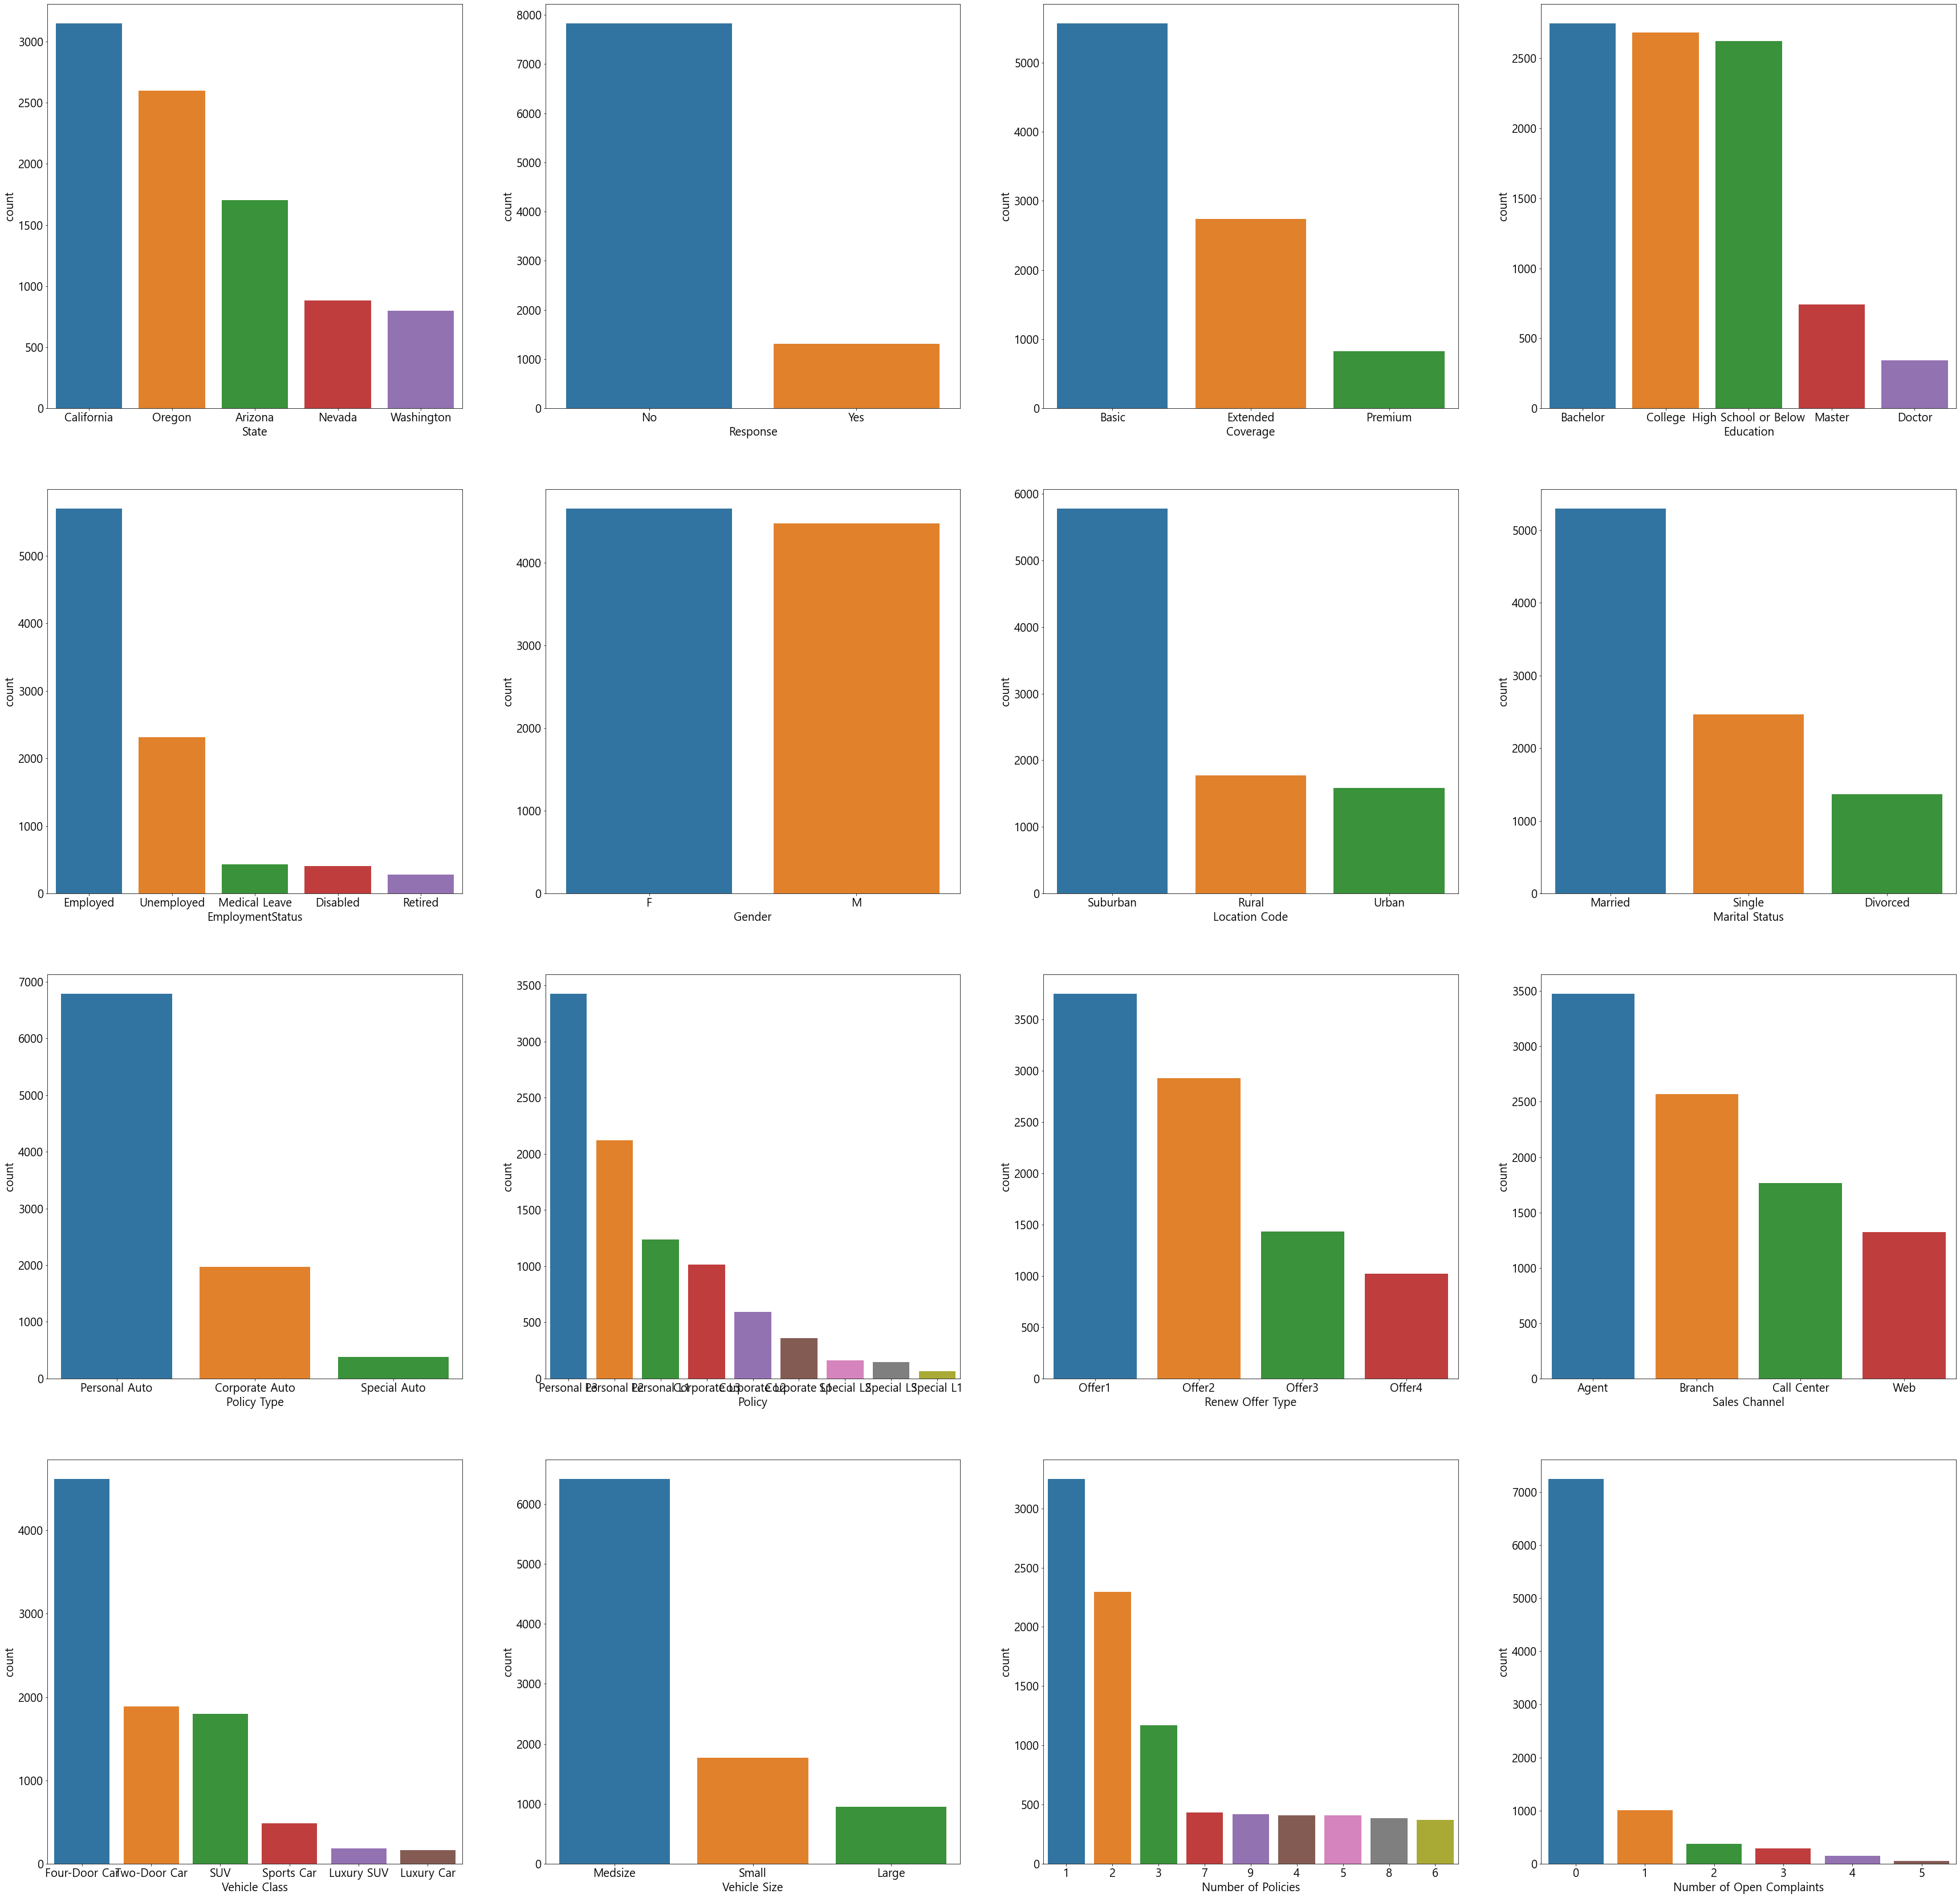

In [10]:
#변수 EDA
def count(x,ax):
    return sns.countplot(data[x],ax=ax,order=data[x].value_counts().index)

figure,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16))=plt.subplots(nrows=4,ncols=4)
figure.set_size_inches(60,60)
count('State',ax=ax1)
count('Response',ax=ax2)
count('Coverage',ax=ax3)
count('Education',ax=ax4)
count('EmploymentStatus',ax=ax5)
count('Gender',ax=ax6)
count('Location Code',ax=ax7)
count('Marital Status',ax=ax8)
count('Policy Type',ax=ax9)
count('Policy',ax=ax10)
count('Renew Offer Type',ax=ax11)
count('Sales Channel',ax=ax12)
count('Vehicle Class',ax=ax13)
count('Vehicle Size',ax=ax14)
count('Number of Policies',ax=ax15)
count('Number of Open Complaints',ax=ax16)

### state : 캘리포니아주에 거주중인 고객이 가장 많았으며 오리건, 애리조나주에 사는 고객이 그 다음으로 많았다. 

### Response : 응답 여부는 No가 7826건으로 80% 이상의 표율을 보였다.

### Coverage : 보험 등급은 Basic이 5568건으로 가장 많았고 Extended가 2742, Premium이 824건으로 고객중 대다수가 Basic~Extended인 것을 알 수 있었다. 

### Education : 고객의 학력은 4년제졸-2,3년제졸-고졸 이하 순으로 많았으나 비슷한 값을 보였고 석사졸이 741, 박사졸 이 342명으로 낮았다.

### EmploymentStatus : 약 5700명정도가 직업을 가지고 있었으며 실업자 2317명, 병가자 432, 장애인이 405명, 퇴직자가 282명이었다. 

### Gender : 남성이 4476, 여성이 4658명으로 여성이 약간 더 많았다.

### Location Code : 도시 교외에 사는 사람이 5779명, 시골에 사는 사람이 1773명, 도시에 사는 사람이 1582명으로 나타 났다.

### Marital Status : 기혼이 5298명, 미혼이 2467명, 이혼이 1369명으로 나타났다.

### Policy Type : 개인보험이 6788명으로 가장 많았으며 단체보험이 1968명, 특약보험이 378명으로 나타났다.

### Policy : Policy Type변수에서 세분화된 것으로 개인보험의 경우 L3가 3426명, L2가 2122명, L1이 1240명이었고 단체 보험의 경우 L3가 1014명, L2가 595명, L1이 359명으로 나타났으며 특약보험의 경우 L2가 164명으로 특약중 가장 많았고 L3가 148명, L1이 66명으로 나타났다.

### Renew Offer Type : Offer1이 3752명으로 가장 많았으며 Offer2가 2926명, Offer3가 1432명, Offer4가 1024명으로 나 타났다. 

### Sales Channel : 약 3500명이 보험 대행점에서 보험을 구매하였고 지사에서 2567명, 콜센터를 통해 1765명이 구입하였 으며 인터넷을 통해 1325명이 보험을 구입했던 것으로 나타났다.

### Vehicle Class : Four-Door Car이 4621로 가장 많았고 Two-Door Car이 1886건, 그 밖에 SUV차량이 1796건, Sports Car, Luxury SUV, Luxury Car 등도 있었다.

### Vehicle Size : 중형차가 가장 많았고 소형차-대형차 순으로 많았다. 

### Number of Policies : 약 6800명정도가 보험을 3개 이하를 구입했고 최대 9개까지 구입한 사람도 416명으로 꽤 있었 다.

### Number of Open Complaints : 해결되지 않은 불만건수의 결과 0부터 5까지 다양하게 있었으며 0(정상적으로 처리된 건 수)이 7252건으로 가장 많았고 1이 1011건, 5가 56건이 있었다.

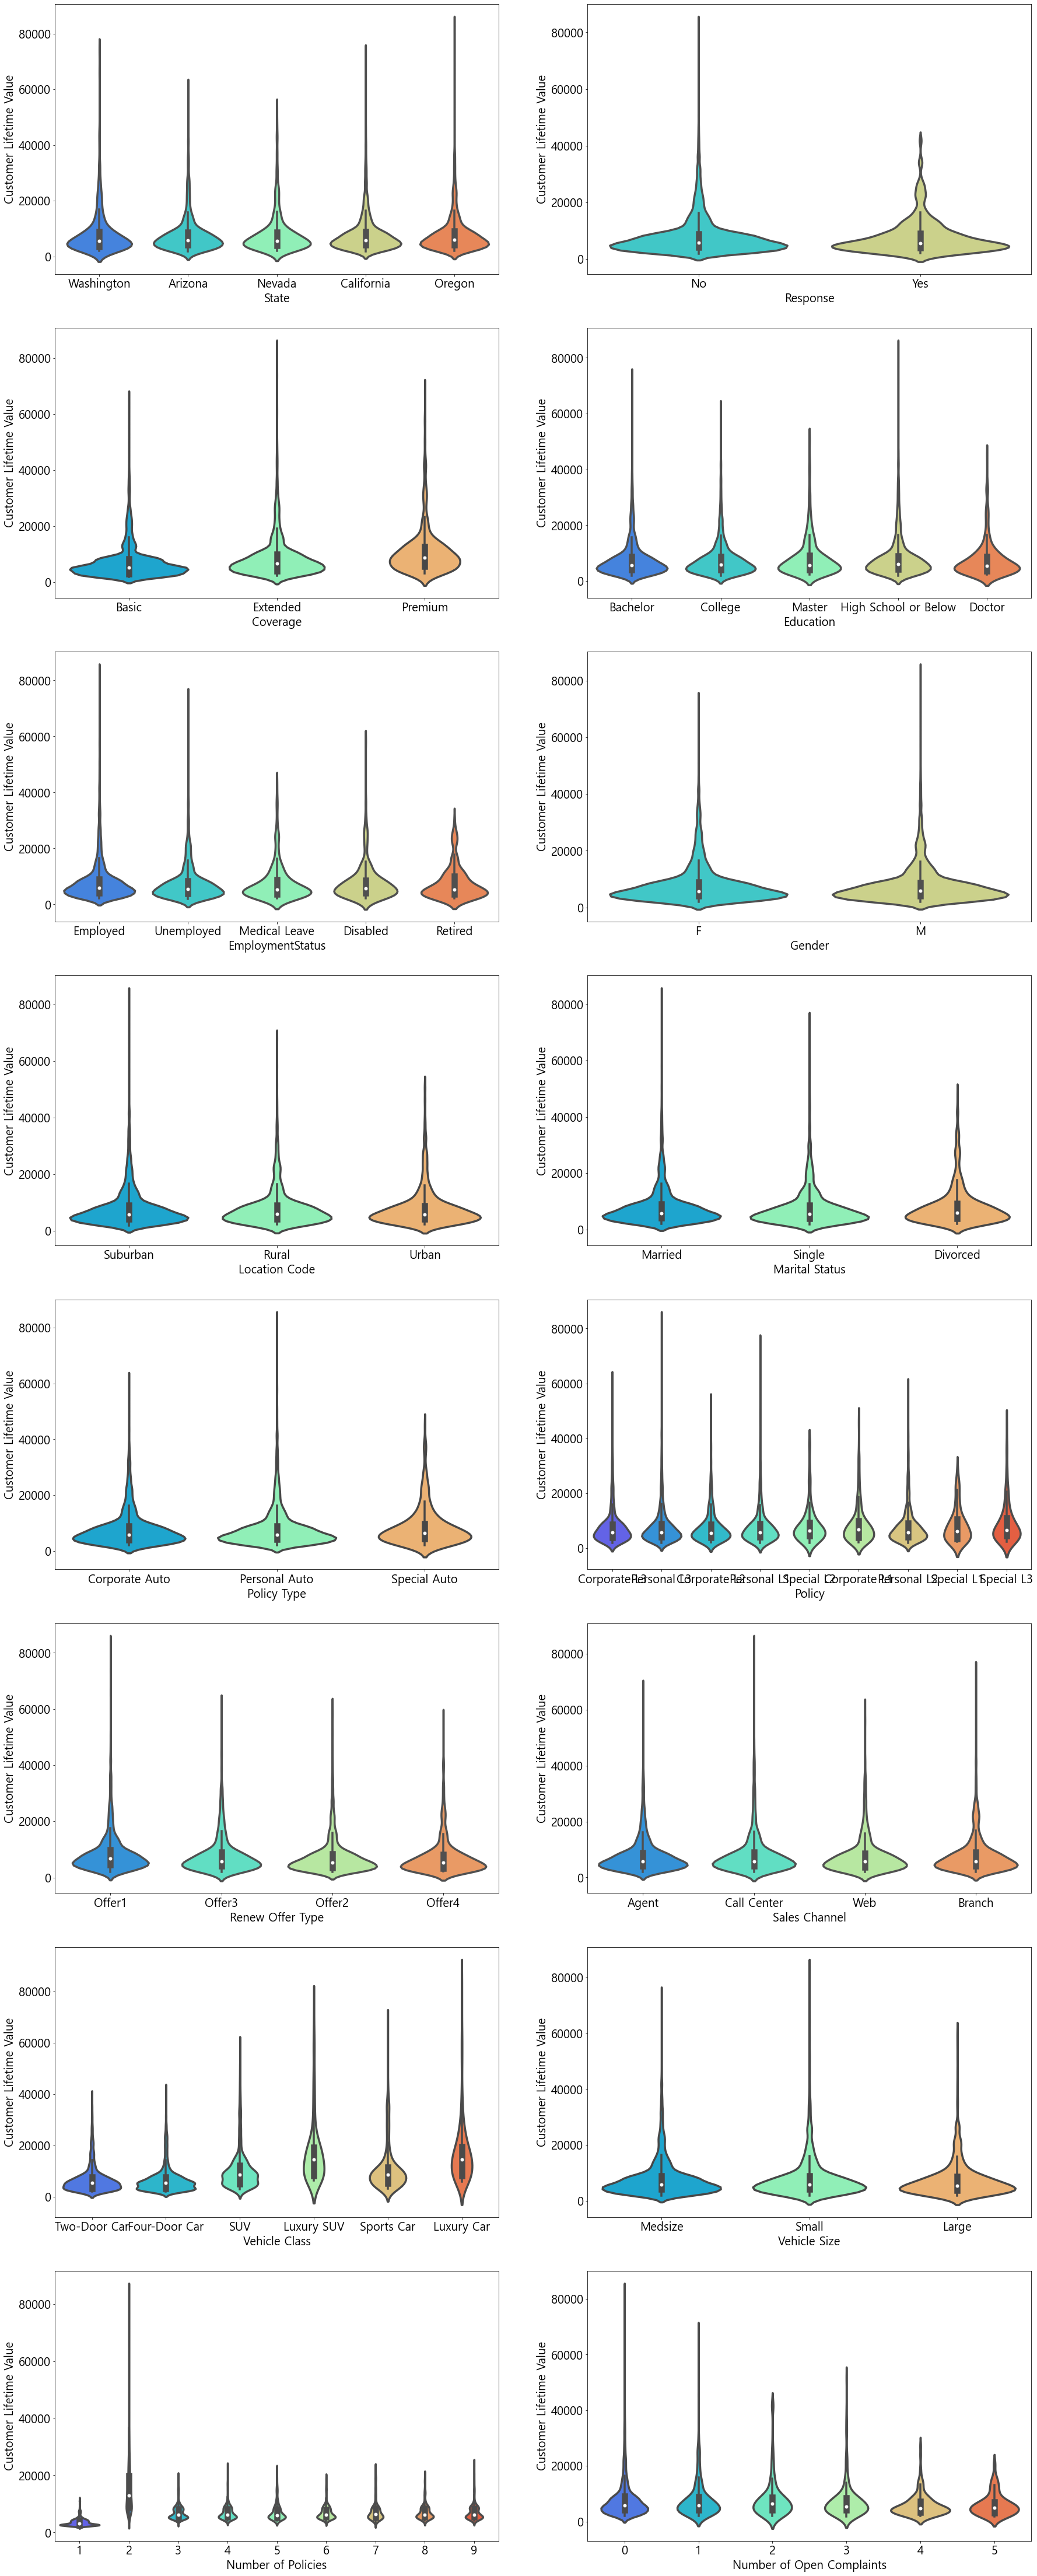

In [11]:
#변수 EDA
def count(x,ax):
    sns.violinplot(y='Customer Lifetime Value',x=x,palette='rainbow',ax=ax,data=data,linewidth=3.5)

figure,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16))=plt.subplots(nrows=8,ncols=2)
figure.set_size_inches(30,80)

count('State',ax=ax1)
count('Response',ax=ax2)
count('Coverage',ax=ax3)
count('Education',ax=ax4)
count('EmploymentStatus',ax=ax5)
count('Gender',ax=ax6)
count('Location Code',ax=ax7)
count('Marital Status',ax=ax8)
count('Policy Type',ax=ax9)
count('Policy',ax=ax10)
count('Renew Offer Type',ax=ax11)
count('Sales Channel',ax=ax12)
count('Vehicle Class',ax=ax13)
count('Vehicle Size',ax=ax14)
count('Number of Policies',ax=ax15)
count('Number of Open Complaints',ax=ax16)

### violin plot을 그려 분포를 확인해 본 결과 보험이 특약인 경우, 차종에 럭셔리가 붙은 경우, 보험의 개수가 2개 이상인 경우가 고객 생애가치가 가장 높았다. 그 밖의 다른 범주들에서는 차이점을 찾지 못했다.

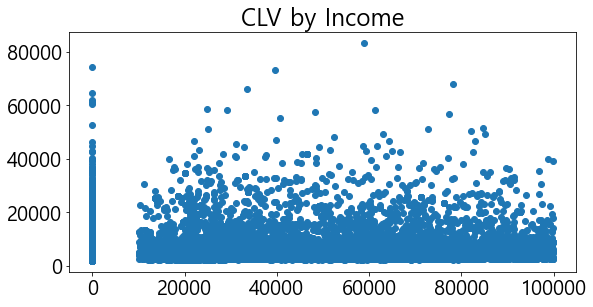

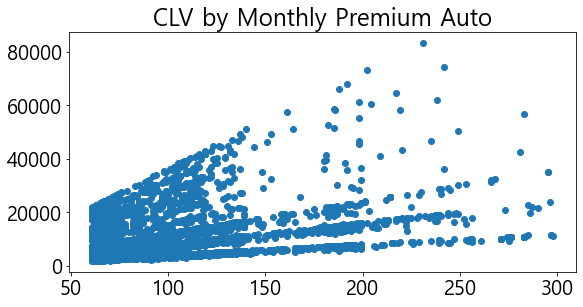

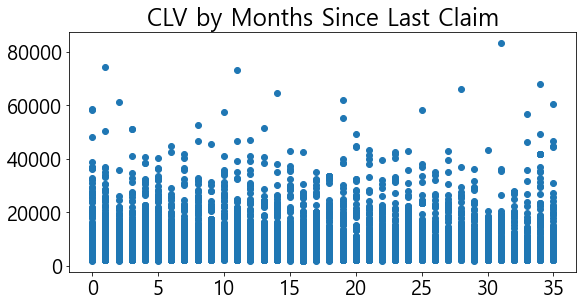

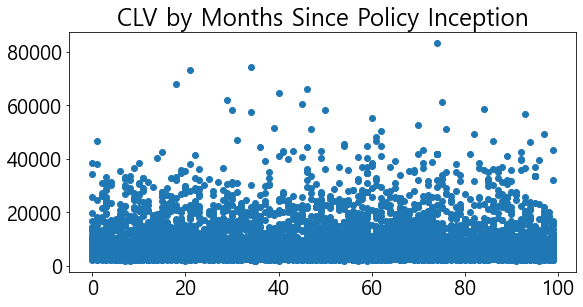

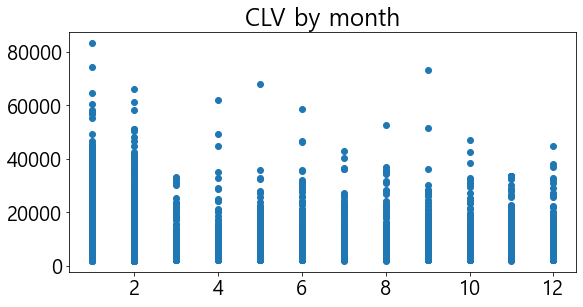

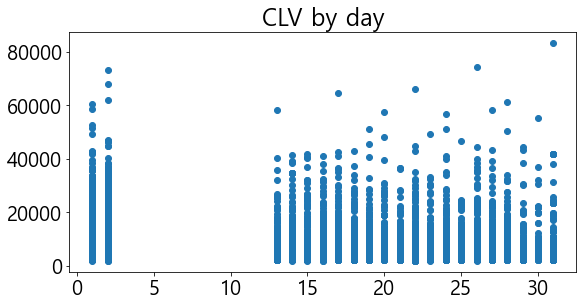

In [12]:
numcol=['Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','month','day']

for i in range(1,len(numcol)+1):
    plt.figure(figsize=(20,15))
    plt.subplot(3,2,i)
    plt.title('CLV by '+numcol[i-1])
    plt.yticks(range(0,100000,20000))
    plt.scatter(x=numcol[i-1],y='Customer Lifetime Value',data=data,)

<AxesSubplot:>

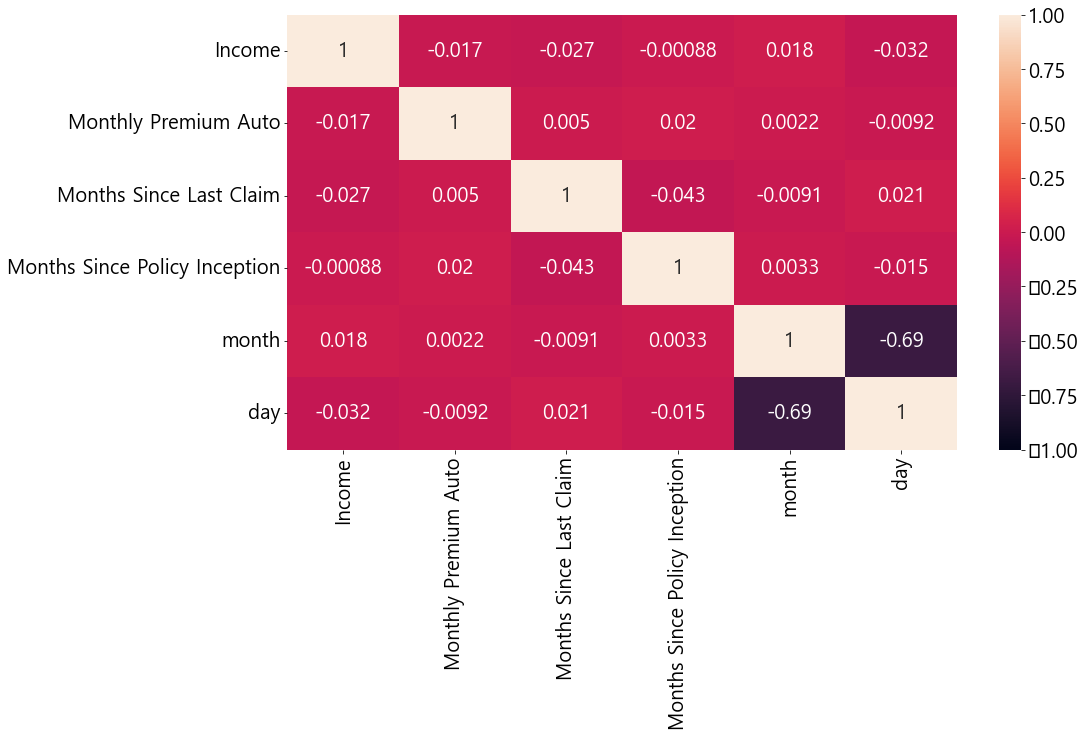

In [13]:
cor=data[numcol].corr()

plt.figure(figsize=(15,8))
sns.heatmap(cor,vmin=-1,vmax=1,annot=True)

In [14]:
df=data.copy()

## ML 전처리

### 1. Income!=0인 데이터만 추출
### 2. 효력 날짜 변수들 제거(CLV를 예측하는데 의미가 없을 거라고 판단)
### 3. 유의미한 변수 Number of Policies, Vehicle Class, Coverage 값들에 가중치를 부여하여 인코딩
### 4. 나머지 명목형 변수 dummy 인코딩
### 5. 수치형 데이터 표준화

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
data=data[data['Income']>0].drop(columns=['year','month','day','Effective To Date'])

In [78]:
data=data.reset_index(drop=True)

In [79]:
def NoP(x):
    div=2
    if x==2:
        div=3
    elif x==1:
        div=1
    else:
        False
    return div

def VC(x):
    div=1
    if x=='Luxury SUV' or x=='Luxury Car':
        div=3
    elif x=='SUV' or x=='Sports Car':
        div=2
    else:
        False
    return div

def Cover(x):
    div=1
    if x=='Premium':
        div=2
    else:
        False
    return div
data['Number of Policies']=data['Number of Policies'].apply(lambda x:NoP(x))
data['Vehicle Class']=data['Vehicle Class'].apply(lambda x:VC(x))
data['Coverage']=data['Coverage'].apply(lambda x:Cover(x))

In [81]:
data=pd.get_dummies(data)

In [82]:
numcol=['Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Total Claim Amount','Customer Lifetime Value']
scaler=StandardScaler().fit(data[numcol])
data[numcol]=scaler.transform(data[numcol])

## Modeling

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

In [158]:
y=data['Customer Lifetime Value']
X=data.drop(columns='Customer Lifetime Value')

In [159]:
def models2(models):
    model=models()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    return r2_score(y_test,pred)

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2022)

score=[]
models=[LinearRegression,RandomForestRegressor,KNeighborsRegressor,DecisionTreeRegressor,XGBRegressor,LGBMRegressor,CatBoostRegressor]
for model in models:    
    score.append(models2(model))

Learning rate set to 0.053526
0:	learn: 0.9631584	total: 2.01ms	remaining: 2.01s
1:	learn: 0.9285585	total: 4.39ms	remaining: 2.19s
2:	learn: 0.8942031	total: 6.54ms	remaining: 2.17s
3:	learn: 0.8631169	total: 8.77ms	remaining: 2.18s
4:	learn: 0.8326914	total: 11.3ms	remaining: 2.25s
5:	learn: 0.8048624	total: 13.4ms	remaining: 2.21s
6:	learn: 0.7804003	total: 15.5ms	remaining: 2.2s
7:	learn: 0.7553308	total: 17.7ms	remaining: 2.19s
8:	learn: 0.7336818	total: 19.8ms	remaining: 2.18s
9:	learn: 0.7151700	total: 21.1ms	remaining: 2.09s
10:	learn: 0.6966158	total: 23.1ms	remaining: 2.08s
11:	learn: 0.6781933	total: 25.3ms	remaining: 2.08s
12:	learn: 0.6625027	total: 27.4ms	remaining: 2.08s
13:	learn: 0.6468830	total: 29.4ms	remaining: 2.07s
14:	learn: 0.6318216	total: 31.6ms	remaining: 2.07s
15:	learn: 0.6194219	total: 33.6ms	remaining: 2.07s
16:	learn: 0.6064934	total: 35.7ms	remaining: 2.06s
17:	learn: 0.5941783	total: 37.9ms	remaining: 2.07s
18:	learn: 0.5834763	total: 40ms	remaining: 2

164:	learn: 0.3547711	total: 351ms	remaining: 1.77s
165:	learn: 0.3540560	total: 353ms	remaining: 1.77s
166:	learn: 0.3539173	total: 355ms	remaining: 1.77s
167:	learn: 0.3530984	total: 357ms	remaining: 1.77s
168:	learn: 0.3528104	total: 360ms	remaining: 1.77s
169:	learn: 0.3526161	total: 362ms	remaining: 1.77s
170:	learn: 0.3521676	total: 365ms	remaining: 1.77s
171:	learn: 0.3519967	total: 367ms	remaining: 1.77s
172:	learn: 0.3518800	total: 369ms	remaining: 1.76s
173:	learn: 0.3517115	total: 371ms	remaining: 1.76s
174:	learn: 0.3511094	total: 373ms	remaining: 1.76s
175:	learn: 0.3506962	total: 375ms	remaining: 1.75s
176:	learn: 0.3505746	total: 377ms	remaining: 1.75s
177:	learn: 0.3503995	total: 381ms	remaining: 1.76s
178:	learn: 0.3500081	total: 383ms	remaining: 1.76s
179:	learn: 0.3491643	total: 385ms	remaining: 1.75s
180:	learn: 0.3490929	total: 387ms	remaining: 1.75s
181:	learn: 0.3486047	total: 389ms	remaining: 1.75s
182:	learn: 0.3483320	total: 391ms	remaining: 1.75s
183:	learn: 

325:	learn: 0.3038892	total: 727ms	remaining: 1.5s
326:	learn: 0.3031220	total: 729ms	remaining: 1.5s
327:	learn: 0.3029218	total: 732ms	remaining: 1.5s
328:	learn: 0.3022793	total: 735ms	remaining: 1.5s
329:	learn: 0.3018986	total: 737ms	remaining: 1.5s
330:	learn: 0.3012890	total: 739ms	remaining: 1.49s
331:	learn: 0.3009823	total: 741ms	remaining: 1.49s
332:	learn: 0.3009252	total: 743ms	remaining: 1.49s
333:	learn: 0.3006632	total: 745ms	remaining: 1.49s
334:	learn: 0.3000899	total: 748ms	remaining: 1.48s
335:	learn: 0.2997876	total: 750ms	remaining: 1.48s
336:	learn: 0.2995055	total: 752ms	remaining: 1.48s
337:	learn: 0.2992406	total: 753ms	remaining: 1.48s
338:	learn: 0.2990168	total: 755ms	remaining: 1.47s
339:	learn: 0.2986866	total: 757ms	remaining: 1.47s
340:	learn: 0.2981619	total: 759ms	remaining: 1.47s
341:	learn: 0.2979080	total: 761ms	remaining: 1.46s
342:	learn: 0.2977560	total: 763ms	remaining: 1.46s
343:	learn: 0.2972887	total: 765ms	remaining: 1.46s
344:	learn: 0.297

504:	learn: 0.2495132	total: 1.08s	remaining: 1.06s
505:	learn: 0.2493488	total: 1.08s	remaining: 1.06s
506:	learn: 0.2492743	total: 1.09s	remaining: 1.06s
507:	learn: 0.2488110	total: 1.09s	remaining: 1.05s
508:	learn: 0.2486373	total: 1.09s	remaining: 1.05s
509:	learn: 0.2484404	total: 1.09s	remaining: 1.05s
510:	learn: 0.2481423	total: 1.1s	remaining: 1.05s
511:	learn: 0.2478769	total: 1.1s	remaining: 1.05s
512:	learn: 0.2474673	total: 1.1s	remaining: 1.04s
513:	learn: 0.2473067	total: 1.1s	remaining: 1.04s
514:	learn: 0.2471107	total: 1.1s	remaining: 1.04s
515:	learn: 0.2470419	total: 1.1s	remaining: 1.04s
516:	learn: 0.2465529	total: 1.11s	remaining: 1.03s
517:	learn: 0.2462744	total: 1.11s	remaining: 1.03s
518:	learn: 0.2461651	total: 1.11s	remaining: 1.03s
519:	learn: 0.2459498	total: 1.11s	remaining: 1.03s
520:	learn: 0.2457186	total: 1.12s	remaining: 1.03s
521:	learn: 0.2454019	total: 1.12s	remaining: 1.02s
522:	learn: 0.2452067	total: 1.12s	remaining: 1.02s
523:	learn: 0.2451

739:	learn: 0.1972263	total: 1.62s	remaining: 570ms
740:	learn: 0.1971959	total: 1.63s	remaining: 568ms
741:	learn: 0.1967378	total: 1.63s	remaining: 566ms
742:	learn: 0.1964090	total: 1.63s	remaining: 564ms
743:	learn: 0.1963001	total: 1.63s	remaining: 562ms
744:	learn: 0.1959644	total: 1.63s	remaining: 559ms
745:	learn: 0.1959365	total: 1.64s	remaining: 557ms
746:	learn: 0.1956133	total: 1.64s	remaining: 555ms
747:	learn: 0.1954721	total: 1.64s	remaining: 553ms
748:	learn: 0.1953568	total: 1.64s	remaining: 551ms
749:	learn: 0.1953029	total: 1.64s	remaining: 548ms
750:	learn: 0.1950386	total: 1.65s	remaining: 546ms
751:	learn: 0.1946867	total: 1.65s	remaining: 544ms
752:	learn: 0.1946415	total: 1.65s	remaining: 542ms
753:	learn: 0.1942894	total: 1.65s	remaining: 539ms
754:	learn: 0.1938477	total: 1.65s	remaining: 537ms
755:	learn: 0.1937486	total: 1.66s	remaining: 535ms
756:	learn: 0.1937200	total: 1.66s	remaining: 532ms
757:	learn: 0.1935989	total: 1.66s	remaining: 530ms
758:	learn: 

983:	learn: 0.1574557	total: 2.16s	remaining: 35.1ms
984:	learn: 0.1573378	total: 2.16s	remaining: 32.9ms
985:	learn: 0.1572529	total: 2.17s	remaining: 30.8ms
986:	learn: 0.1572014	total: 2.17s	remaining: 28.6ms
987:	learn: 0.1571224	total: 2.17s	remaining: 26.4ms
988:	learn: 0.1569575	total: 2.17s	remaining: 24.2ms
989:	learn: 0.1567423	total: 2.19s	remaining: 22.1ms
990:	learn: 0.1566507	total: 2.19s	remaining: 19.9ms
991:	learn: 0.1565268	total: 2.19s	remaining: 17.7ms
992:	learn: 0.1563200	total: 2.2s	remaining: 15.5ms
993:	learn: 0.1561901	total: 2.2s	remaining: 13.3ms
994:	learn: 0.1559741	total: 2.2s	remaining: 11.1ms
995:	learn: 0.1559138	total: 2.2s	remaining: 8.85ms
996:	learn: 0.1558428	total: 2.21s	remaining: 6.63ms
997:	learn: 0.1557307	total: 2.21s	remaining: 4.42ms
998:	learn: 0.1556321	total: 2.21s	remaining: 2.21ms
999:	learn: 0.1555590	total: 2.21s	remaining: 0us


In [166]:
vot_model=VotingRegressor(estimators=[('LinearRegression',LinearRegression()),('RandomForestRegressor',RandomForestRegressor())\
                                      ,('DecisionTreeRegressor',DecisionTreeRegressor()),('LGBoost',LGBMRegressor())\
                                      ,('KNeighborsRegressor',KNeighborsRegressor()),('XGBoost',XGBRegressor()),('CatBoost',CatBoostRegressor())],n_jobs=-1)

In [167]:
vot_model.fit(X_train,y_train)
pred=vot_model.predict(X_test)
score.append(r2_score(y_test,pred))

<AxesSubplot:title={'center':'모델별 R2_SCORE 비교'}, xlabel='기법', ylabel='R2_score'>

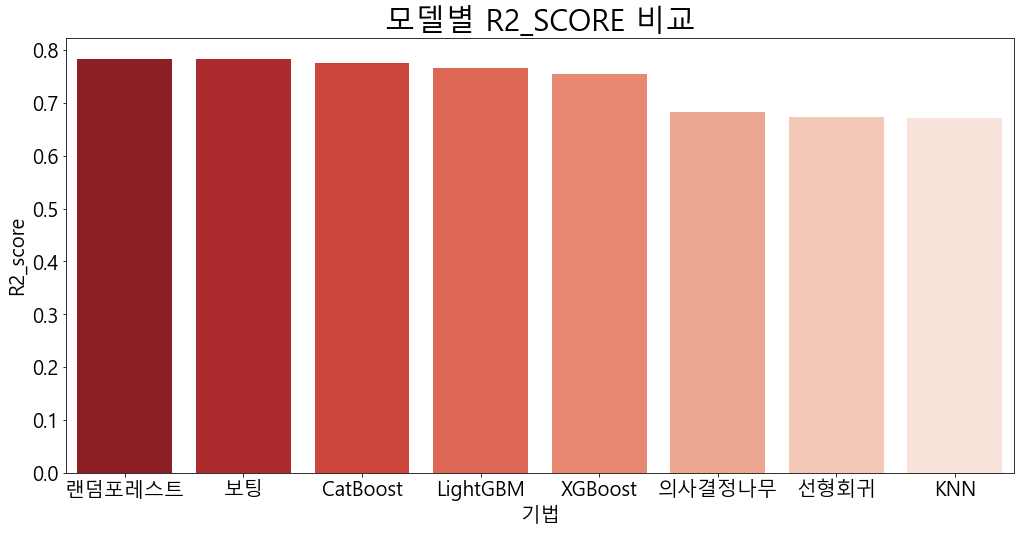

In [169]:
modeling=pd.DataFrame(score,index=['선형회귀','랜덤포레스트','KNN','의사결정나무','XGBoost','LightGBM','CatBoost','보팅'],columns=['R2_score']).reset_index().rename(columns={'index':'기법'})
modeling=modeling.sort_values('R2_score',ascending=False).reset_index(drop=True)

plt.figure(figsize=(17,8))
plt.title('모델별 R2_SCORE 비교',fontsize=30)
sns.barplot(x='기법',y='R2_score',data=modeling,palette='Reds_r')

In [193]:
modeling

,기법,R2_score
0,랜덤포레스트,0.783537
1,보팅,0.782491
2,CatBoost,0.774378
3,LightGBM,0.765585
4,XGBoost,0.755032
5,의사결정나무,0.683278
6,선형회귀,0.672322
7,KNN,0.670983


In [173]:
final_model=RandomForestRegressor()
final_model.fit(X_train,y_train)

RandomForestRegressor()

<BarContainer object of 7 artists>

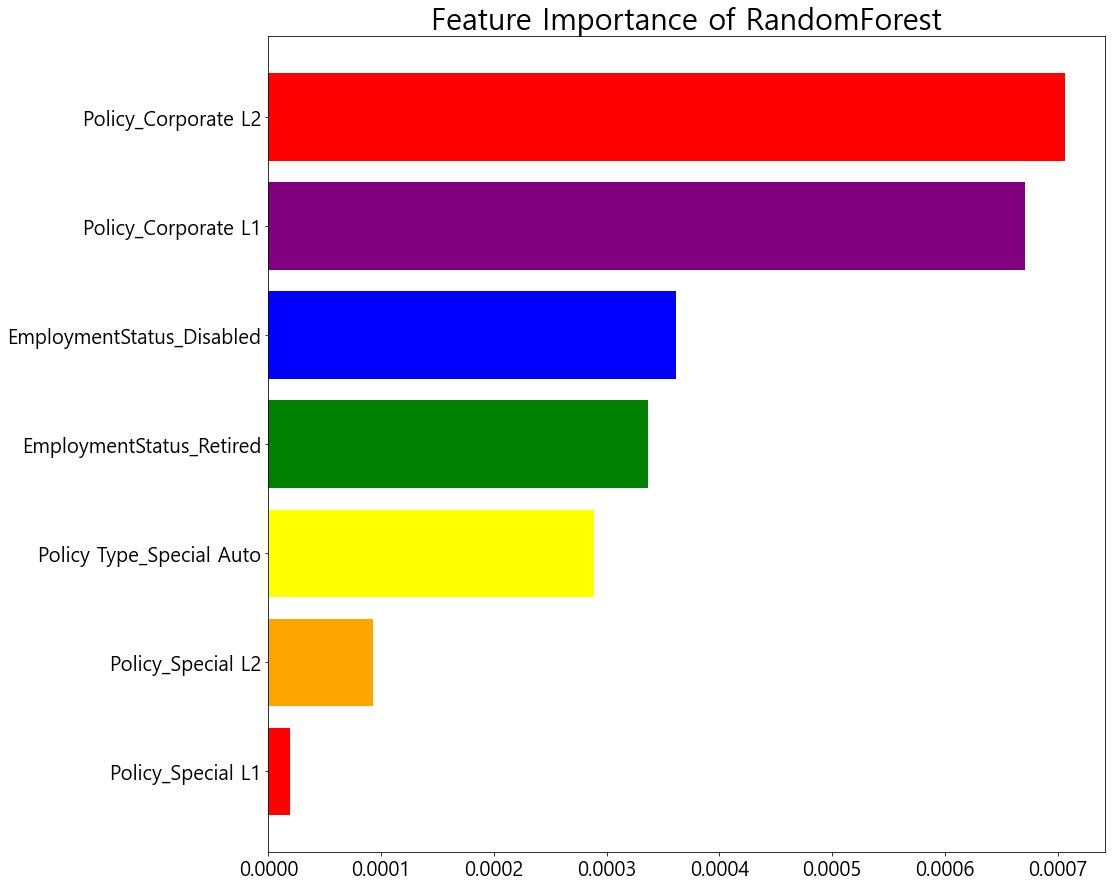

In [192]:
feature_imp=pd.DataFrame(final_model.feature_importances_,index=X.columns,columns=['특성 중요도']).sort_values(by='특성 중요도',ascending=True).reset_index().head(7)

plt.figure(figsize=(15,15))
plt.title('Feature Importance of RandomForest',fontsize=30)
plt.barh(feature_imp['index'],feature_imp['특성 중요도'],color=['red','orange','yellow','green','blue','purple'])

In [196]:
pred=final_model.predict(X_test)

In [198]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred)

0.21811656093494597

## 2.고객세분화

### 군집분석

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [84]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

<AxesSubplot:title={'center':'Elbow Plot'}>

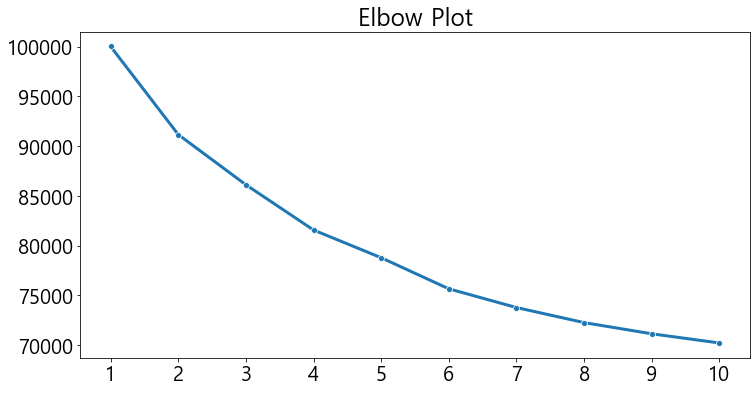

In [85]:
plt.figure(figsize=(12,6))
plt.title('Elbow Plot')
plt.xticks(list(range(1,11)))
sns.lineplot(x=list(range(1,11)),y=inertia,marker='o',linewidth=3)

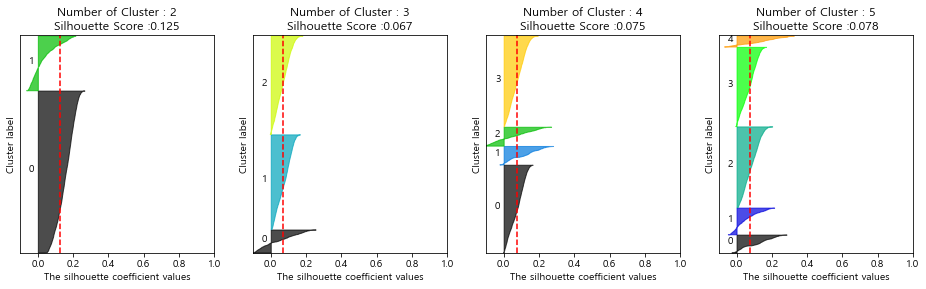

In [88]:
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster,init='k-means++')
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성   

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], data)

In [89]:
model=KMeans(n_clusters=5,init='k-means++')

In [90]:
pred=model.fit_predict(data)

In [91]:
data['cluster']=pred

In [92]:
corlist=['Customer Lifetime Value','Coverage','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','cluster']

In [96]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pcascaler=pca.fit_transform(data[corlist])

In [100]:
pred

array([1, 4, 2, ..., 4, 1, 1])

In [104]:
pcadata=pd.DataFrame(pcascaler,columns=['PCA_1','PCA_2'])
pcadata['cluster']=pred

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

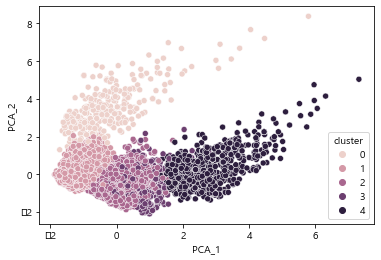

In [107]:
sns.scatterplot(x='PCA_1',y='PCA_2',hue='cluster',data=pcadata)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [58] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


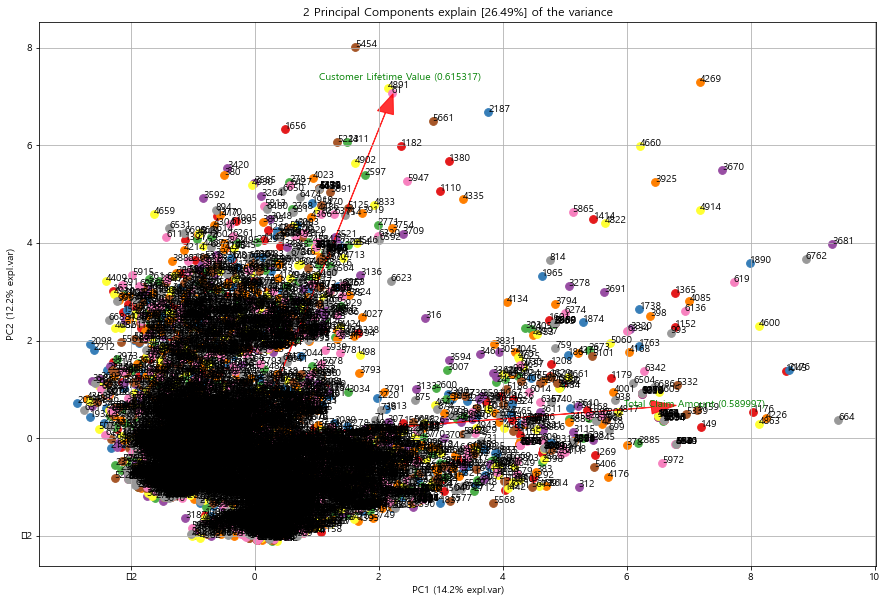

In [110]:
from pca import pca
model=pca(n_components=2)
model.fit_transform(data)
fig,ax=model.biplot(n_feat=1,legend=False)

In [114]:
pcadata['CLV']=df['Customer Lifetime Value']
pcadata['Total_claim_amount']=df['Total Claim Amount']

In [130]:
CLV=pcadata.groupby('cluster')['CLV'].mean().reset_index()

<AxesSubplot:title={'center':'CLV by cluster '}, xlabel='cluster', ylabel='CLV'>

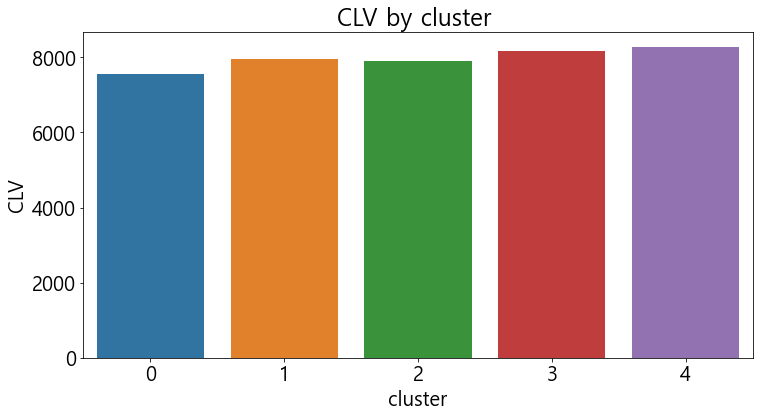

In [139]:
plt.figure(figsize=(12,6))
plt.title('CLV by cluster ')
sns.barplot(CLV['cluster'],CLV['CLV'])

In [202]:
CLV['CLV']

0    7555.242418
1    7969.143871
2    7908.585070
3    8174.118306
4    8272.024360
Name: CLV, dtype: float64

In [140]:
Tca=pcadata.groupby('cluster')['Total_claim_amount'].mean().reset_index()

<AxesSubplot:title={'center':'Total_claim_amount by cluster'}, xlabel='cluster', ylabel='Total_claim_amount'>

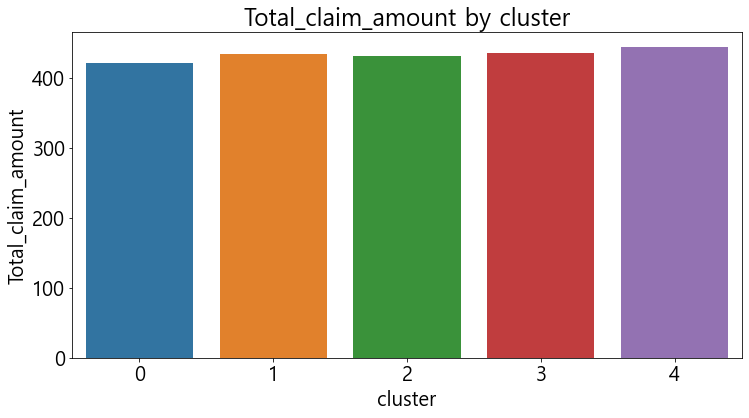

In [199]:
plt.figure(figsize=(12,6))
plt.title('Total_claim_amount by cluster')
sns.barplot(Tca['cluster'],Tca['Total_claim_amount'])

In [203]:
Tca['Total_claim_amount']

0    421.441555
1    433.882455
2    430.666899
3    435.459548
4    443.375635
Name: Total_claim_amount, dtype: float64

In [144]:
CLV['Total_claim_amount']=Tca['Total_claim_amount']

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Customer Lifetime Value'>

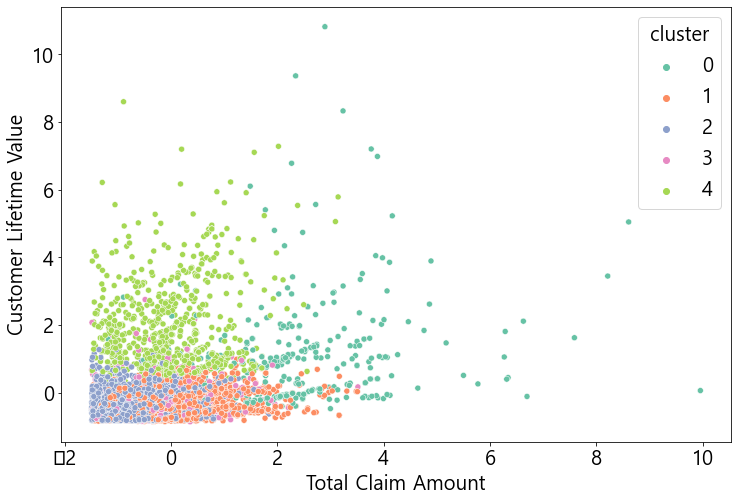

In [155]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Claim Amount',y='Customer Lifetime Value',hue='cluster',palette='Set2',data=data)

In [156]:
data

,Customer Lifetime Value,Coverage,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Class,...,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,cluster
0,-0.772349,1,0.239359,-0.692321,1.684521,-1.535588,-0.42193,1,0.027591,1,...,0,0,1,0,0,0,0,1,0,1
1,0.684632,2,-0.069518,0.434436,0.293427,-0.352508,-0.42193,3,0.746670,1,...,0,0,1,0,0,0,0,1,0,4
2,-0.765128,1,-0.272405,-0.576756,-0.302756,-0.137403,-0.42193,1,-0.948856,1,...,0,0,1,0,0,0,0,1,0,2
3,0.018143,1,0.512069,-0.692321,-0.104028,1.655142,-0.42193,3,-0.864733,1,...,0,0,0,0,0,1,0,1,0,2
4,-0.395669,1,0.201341,-0.750103,-1.495122,-1.248781,-0.42193,2,-0.222621,1,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,-0.445857,1,0.654637,-0.836777,-0.898939,0.006001,-0.42193,2,-0.279621,1,...,0,0,0,0,1,0,0,0,1,2
6813,-0.579952,2,-0.110910,0.318871,0.094700,0.364510,-0.42193,1,0.646958,1,...,0,0,0,1,0,0,1,0,0,1
6814,2.198407,1,0.883981,-0.576756,0.293427,1.475887,-0.42193,3,-0.710944,1,...,0,0,0,0,0,1,0,1,0,4
6815,-0.724426,1,-1.187145,-0.403409,-0.104028,-0.711017,-0.42193,1,0.005380,1,...,0,0,0,1,0,0,0,1,0,1
